In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("seaborn-v0_8-ticks")

# We want our plots to appear inside the notebook
%matplotlib inline

In [2]:
# Load cleaned data
df = pd.read_csv("../data/housing_cleaned.csv")

# Basic statistics
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

         population    households  median_income  median_house_value  \
count  20640.000000  20640.000000   20640.000000        20640.000000   
mean    1425.476744    499.539680       3.870671       206855.816909   
std     1132.462122    382.329753       1.899822       115395.615874   
min        3.000000      1.000000       0.499900        14999.000000   


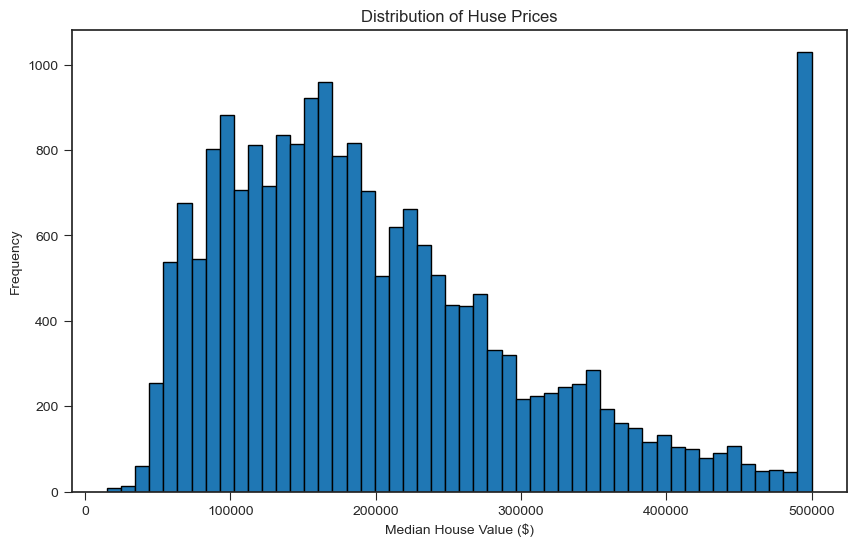

House at max value: 992


In [3]:
# 1. Distribution of target variable (median_house_value)
plt.figure(figsize=(10, 6))
plt.hist(df["median_house_value"], bins=50, edgecolor="black")
plt.xlabel("Median House Value ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Huse Prices")
plt.show()

# Check if there's a cap at $500,000 (comoon in this dataset)
print(f"House at max value: {(df["median_house_value"] >= 500_000).sum()}")

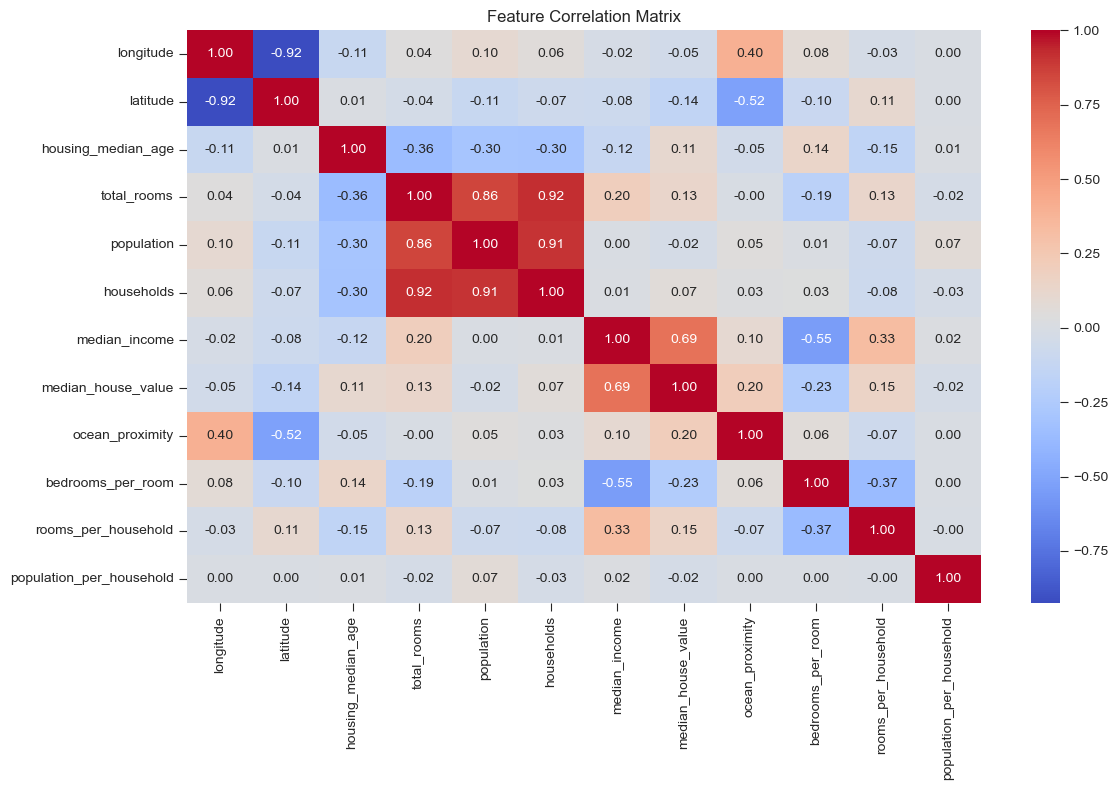


Correlation with median_house_value:
median_house_value          1.000000
median_income               0.688075
ocean_proximity             0.203778
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64


In [4]:
# 2. Correlation heatmap
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# What correlates most with house value?
print("\nCorrelation with median_house_value:")
print(correlation["median_house_value"].sort_values(ascending=False))

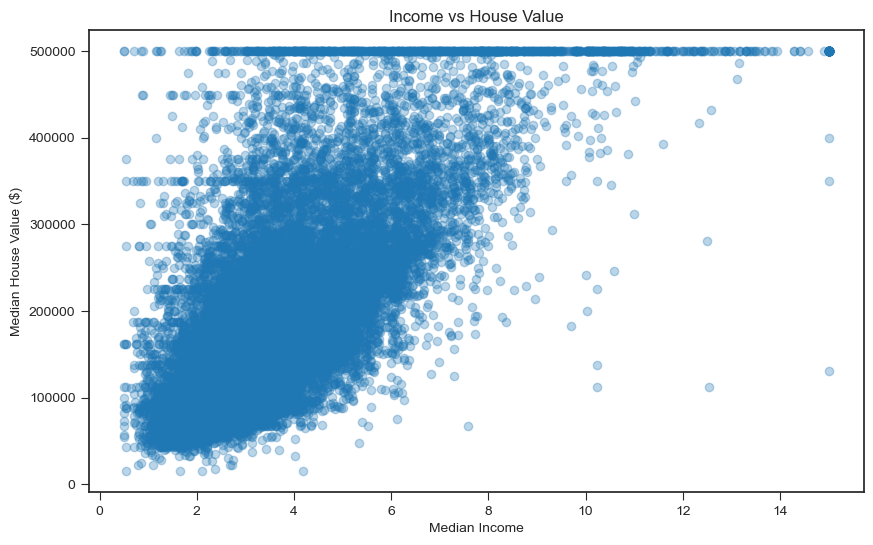

In [5]:
# 3. Relationship between median_income and house_value
plt.figure(figsize=(10, 6))
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value ($)")
plt.title("Income vs House Value")
plt.show()

# This show strong positive correlation!

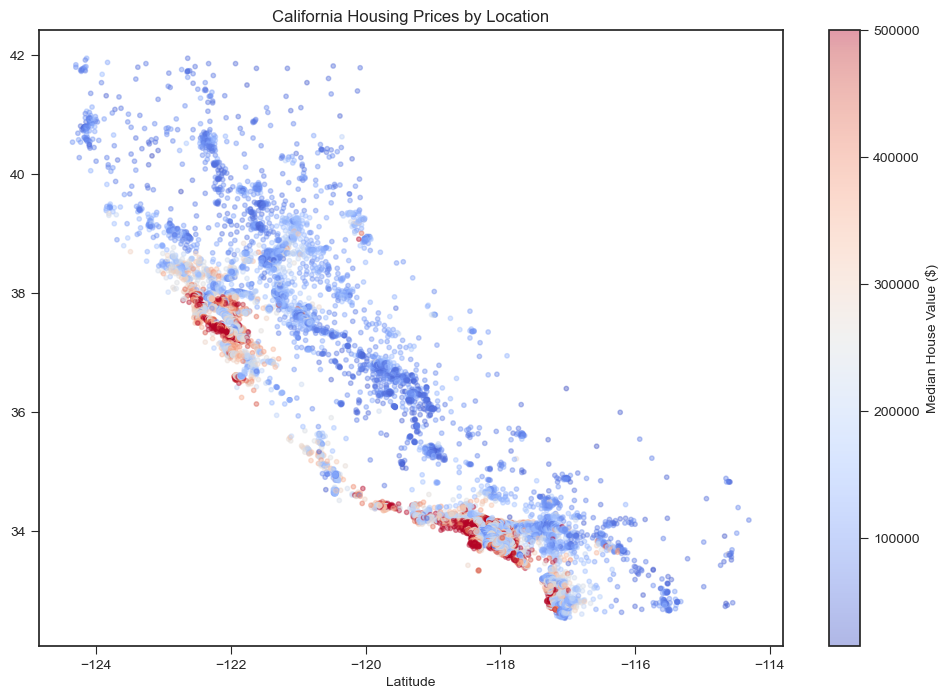

In [6]:
# 4. Geographic visualization
plt.figure(figsize=(12, 8))
plt.scatter(df["longitude"], df["latitude"],
           c=df["median_house_value"],
           cmap="coolwarm",
           alpha=0.4,
           s=10)
plt.colorbar(label="Median House Value ($)")
plt.xlabel("Longitude")
plt.xlabel("Latitude")
plt.title("California Housing Prices by Location")
plt.show()

# You should see expensive areas (like SF, LA) in red!

In [7]:
# 5. Outlier detection
# The Interquartile Range (IQR) is a measure of statistical dispersion, 
# or the spread of the central 50% of the data. It is often used because
# it is more robust to extreme values than the range (Max - Min).

# Check for extremee values
print("Outliers check:")
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    # Identify outliers in the current column
    print(f"{col}: {len(outliers)} outliers ({len(outliers) / len(df) * 100:.2f}%)")

Outliers check:
longitude: 0 outliers (0.00%)
latitude: 0 outliers (0.00%)
housing_median_age: 0 outliers (0.00%)
total_rooms: 1287 outliers (6.24%)
population: 1196 outliers (5.79%)
households: 1220 outliers (5.91%)
median_income: 681 outliers (3.30%)
median_house_value: 1071 outliers (5.19%)
ocean_proximity: 5 outliers (0.02%)
bedrooms_per_room: 635 outliers (3.08%)
rooms_per_household: 511 outliers (2.48%)
population_per_household: 711 outliers (3.44%)


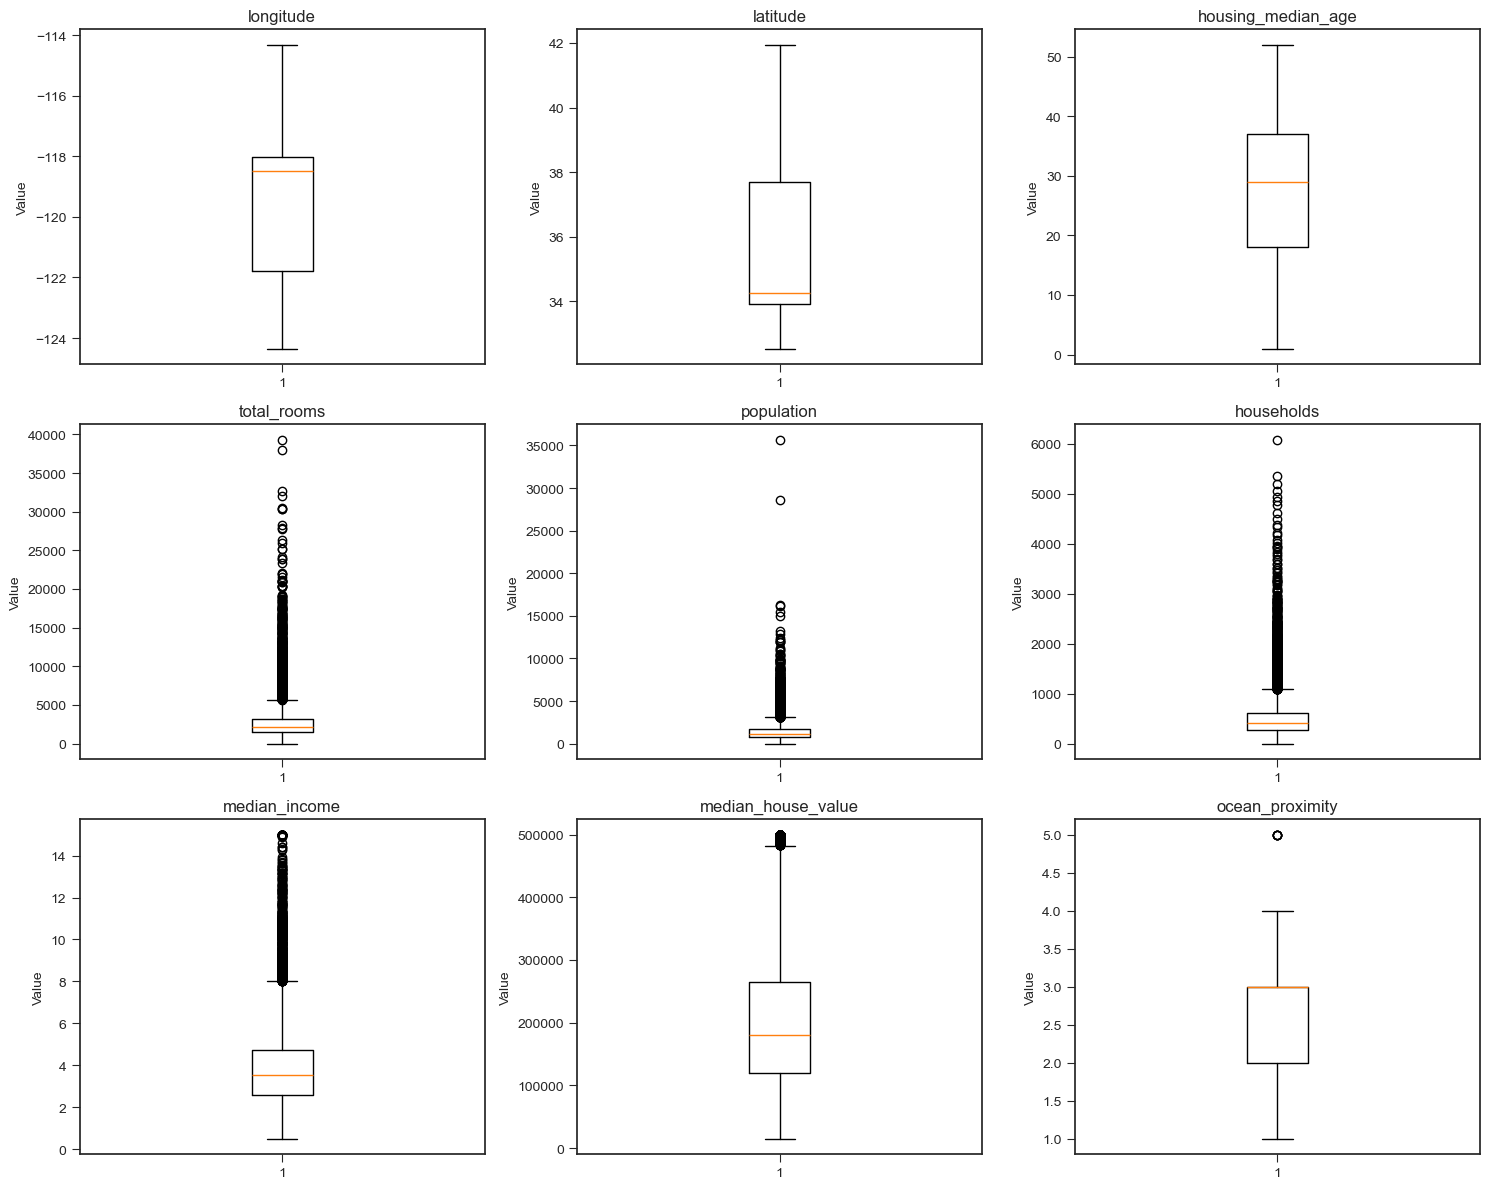

In [8]:
# 6. Box plot for each feature
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()  # Return a contiguous flattened array.

numeric_cols = df.select_dtypes(include=[np.number]).columns[:9]

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(col)
    axes[idx].set_ylabel("Value")

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   population                20640 non-null  float64
 5   households                20640 non-null  float64
 6   median_income             20640 non-null  float64
 7   median_house_value        20640 non-null  float64
 8   ocean_proximity           20640 non-null  int64  
 9   bedrooms_per_room         20640 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.9 MB
